# Analisis Penyajian Data Shop Customer Data
Nama : Azizah Zalfa Assyadida

NPM : 23083010064

Kelas : A-083 (Analisis Data Eksploratif)

## Deskripsi Dataset
Data yang digunakan merupakan analisis terperinci tentang pelanggan ideal sebuah toko imajinatif. Pemilik toko mendapatkan informasi tentang Pelanggan melalui kartu keanggotaan. Data ini dapat membantu bisnis untuk lebih memahami pelanggannya berdasarkan variabel-variabel yang diamati, yakni sebagai berikut:

1. Customer ID : Nomor identifikasi unik pelanggan
2. Gender : Jenis kelamin pelanggan
3. Age : Umur pelanggan
4. Annual Income : Pendapatan pelanggan (dalam USD)
5. Spending Score : Penilaian yang diberikan toko kepada pelanggan, berdasarkan perilaku dan sifat pelanggan saat berkunjung
6. Profession : Pekerjaan pelanggan
7. Work Experience : Pengalaman Pekerjaan Pelanggan (dalam tahun)
8. Family Size : Jumlah anggota keluarga pelanggan

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv (r'C:\Users\azizah zalfa\OneDrive\Dokumen\Shop_Customer_Data.csv')
data.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


In [6]:
data.shape

(2000, 8)

## Preprocessing Data

### Mengatasi  Missing Value

In [7]:
np.sum(data.isnull())

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [8]:
data['Profession'].fillna('None', inplace=True)
np.sum(data.isnull())

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [9]:
datacopy=data.copy()

### Mengecek data Outlier

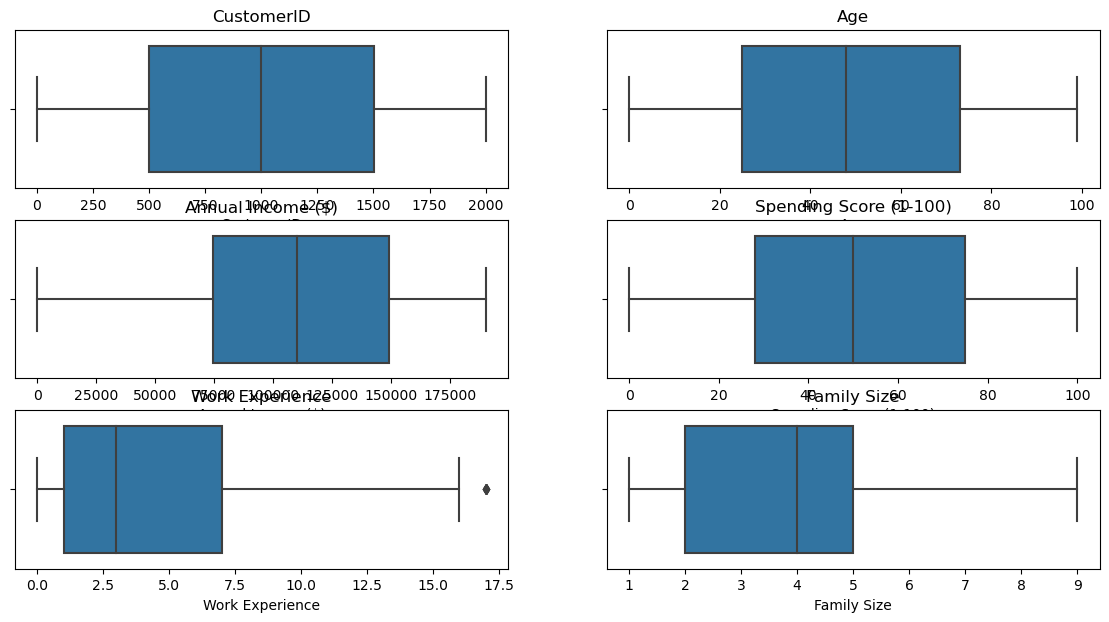

In [10]:
data_cont = data.drop(['Gender', 'Profession'], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,7))

feature_index = 0
for ii in range(3):
    for jj in range(2):
        if feature_index < len(data_cont.columns):
            sns.boxplot(x=data_cont.iloc[:, feature_index], ax=axes[ii, jj], showfliers=True)
            axes[ii, jj].set(title=data_cont.columns.values[feature_index])      
            feature_index += 1

plt.show()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              2000 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


## Eksplorasi Data

#### Menampilkan statistik deskriptif dari data numerik

In [20]:
data.describe()

,CustomerID,Age,Annual Income ($),Spending Score (1-100),Work Experience,Family Size
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,48.960000,110731.821500,50.962500,4.102500,3.768500
std,577.494589,28.429747,45739.536688,27.934661,3.922204,1.970749
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,500.750000,25.000000,74572.000000,28.000000,1.000000,2.000000
50%,1000.500000,48.000000,110045.000000,50.000000,3.000000,4.000000
75%,1500.250000,73.000000,149092.750000,75.000000,7.000000,5.000000
max,2000.000000,99.000000,189974.000000,100.000000,17.000000,9.000000


#### Menampilkan frekuensi dari data Kategorik

In [15]:
Gender_counts = data['Gender'].value_counts()
Profession_counts = data['Profession'].value_counts()

print("Frekuensi Gender:\n", Gender_counts)
print("Frekuensi Profession:\n", Profession_counts)

Frekuensi Gender:
 Female    1186
Male       814
Name: Gender, dtype: int64
Frekuensi Profession:
 Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
None              35
Name: Profession, dtype: int64


### Visualisasi Variabel Kategorik

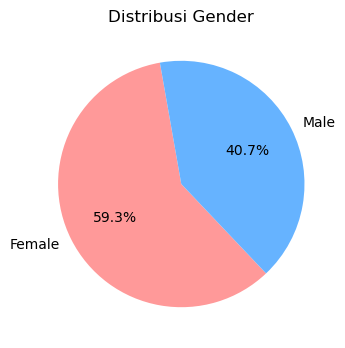

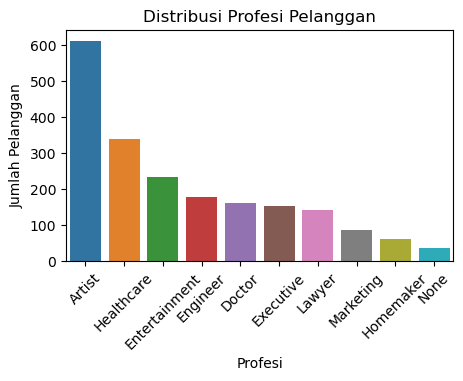

In [39]:
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=100)
plt.title('Distribusi Gender')
plt.show()

plt.figure(figsize=(5, 3))
sns.countplot(x='Profession', data=data, order=data['Profession'].value_counts().index)
plt.title('Distribusi Profesi Pelanggan')
plt.xlabel('Profesi')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45)
plt.show()

### Visualisasi Variabel Numerik

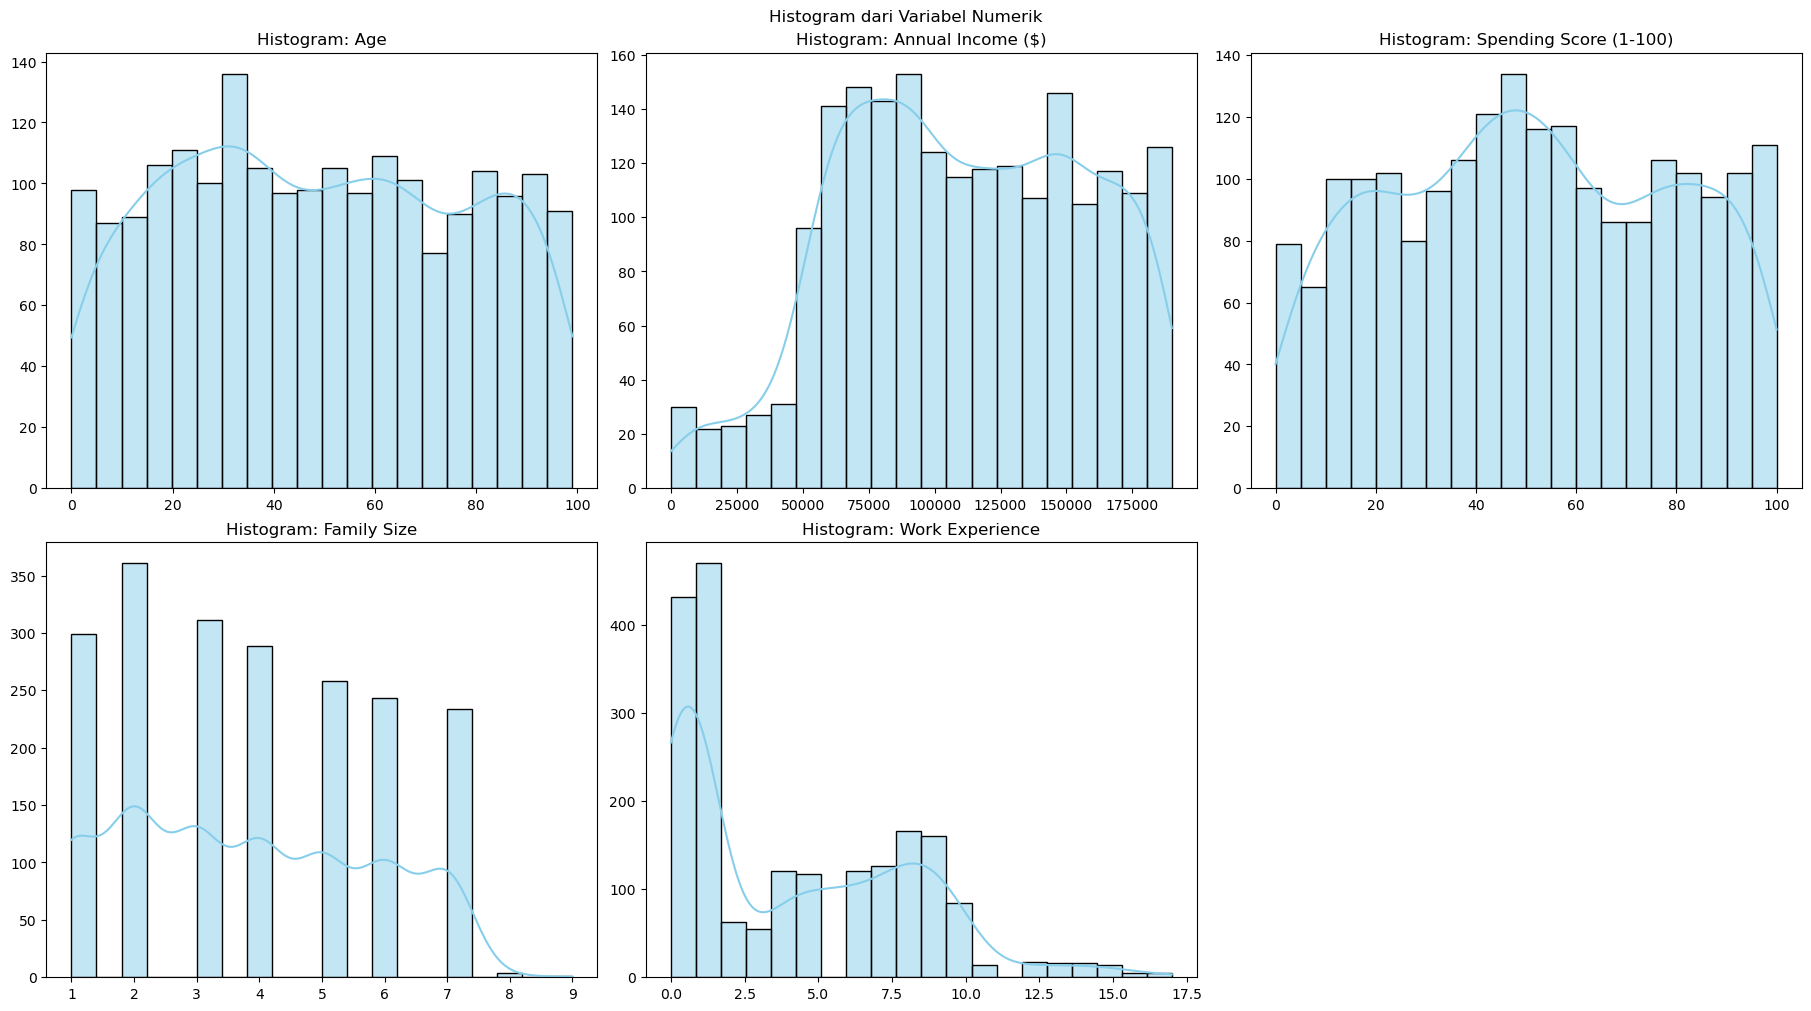

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_vars = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Family Size', 'Work Experience']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), constrained_layout=True)
axes = axes.flatten()
for i, var in enumerate(numeric_vars):
    sns.histplot(data[var], bins=20, kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Histogram: {var}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
for j in range(len(numeric_vars), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Histogram dari Variabel Numerik')
plt.show()


### Membandingkan dengan Diagram Bar

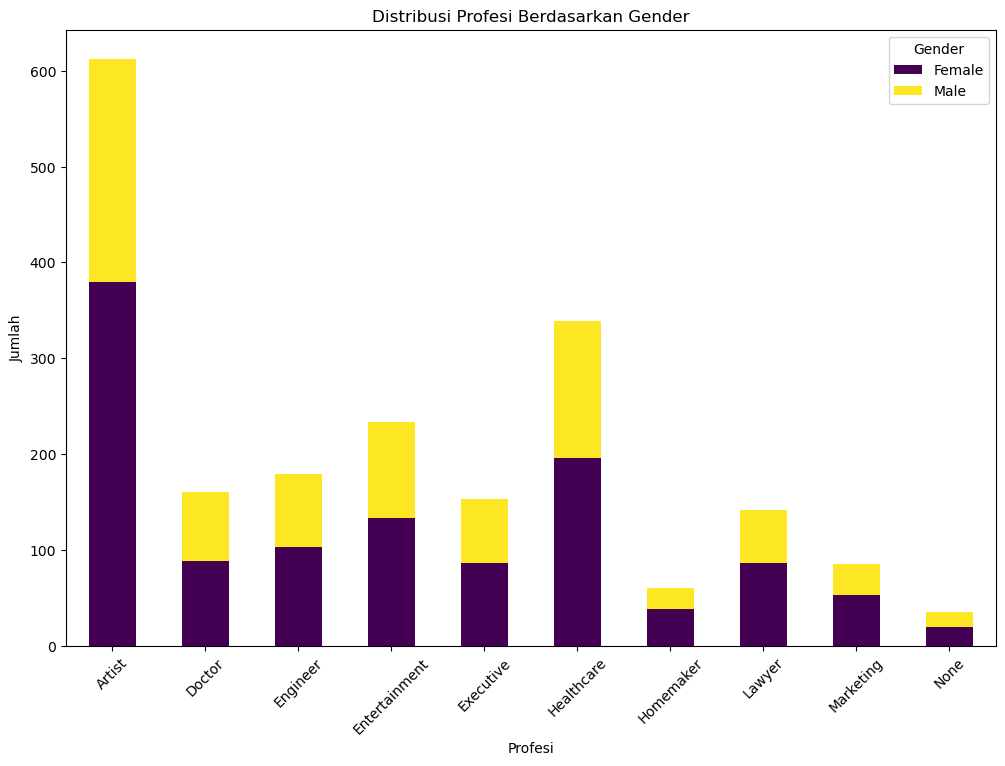

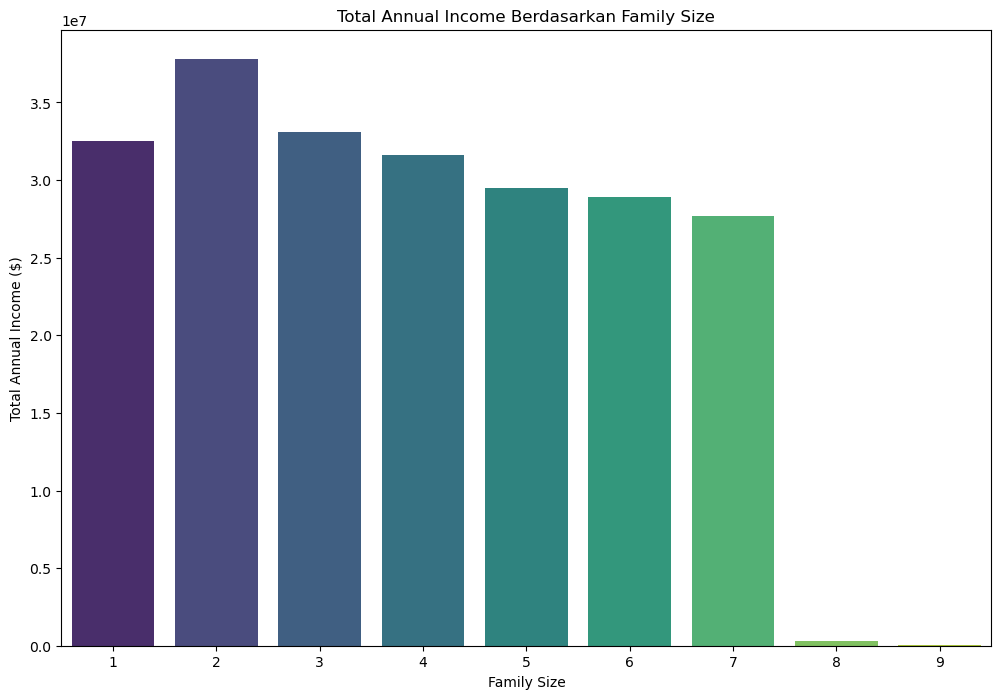

In [40]:
# Profesion berdasarkan Gender
profession_gender_counts = data.groupby(['Profession', 'Gender']).size().unstack()
profession_gender_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Distribusi Profesi Berdasarkan Gender')
plt.xlabel('Profesi')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Annual income berdasarkan Family size
total_income_by_family_size = data.groupby('Family Size')['Annual Income ($)'].sum().sort_index()
plt.figure(figsize=(12, 8))
sns.barplot(x=total_income_by_family_size.index, y=total_income_by_family_size.values, palette='viridis')
plt.title('Total Annual Income Berdasarkan Family Size')
plt.xlabel('Family Size')
plt.ylabel('Total Annual Income ($)')
plt.show()


### Membandingkan dengan Boxplot

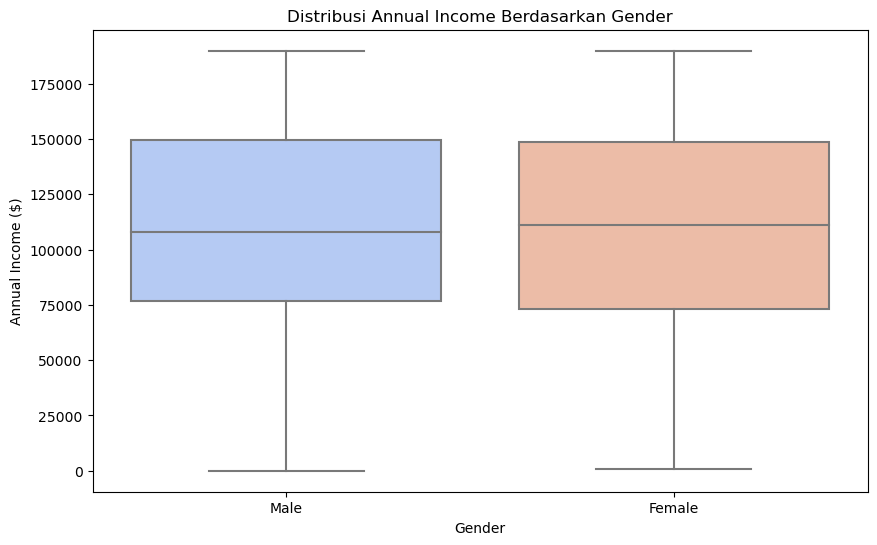

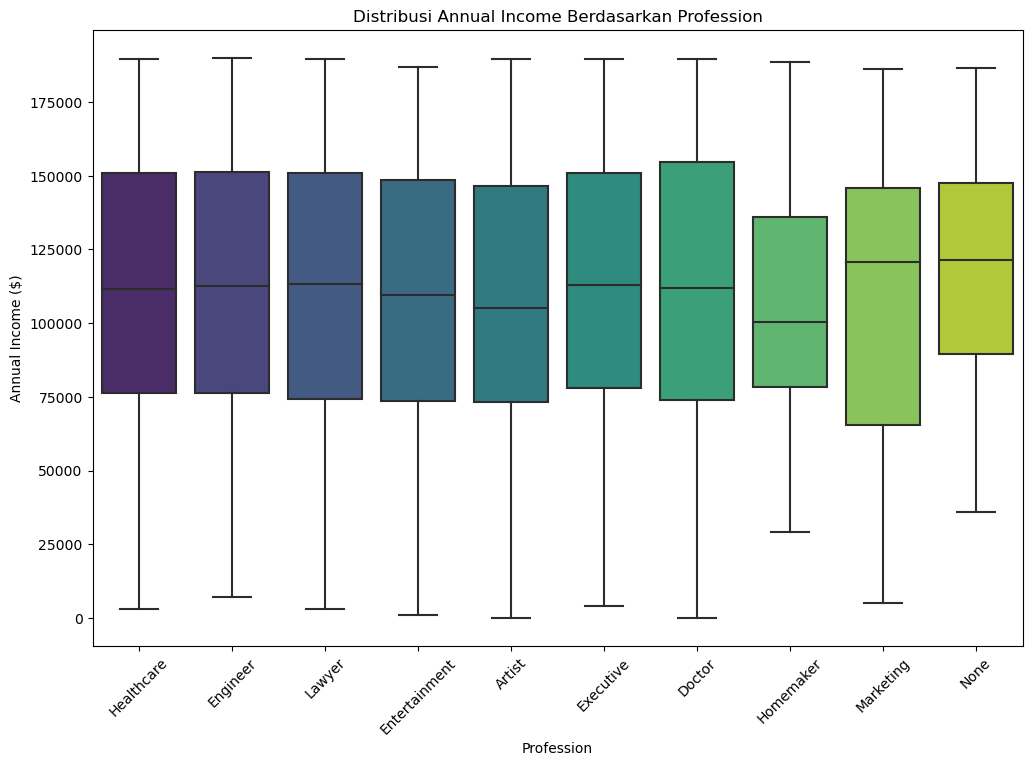

In [41]:
# Annual income berdasarkan gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Annual Income ($)', data=data, palette='coolwarm')
plt.title('Distribusi Annual Income Berdasarkan Gender')
plt.xlabel('Gender')
plt.ylabel('Annual Income ($)')
plt.show()

# Annual income berdasarkan Profession
plt.figure(figsize=(12, 8))
sns.boxplot(x='Profession', y='Annual Income ($)', data=data, palette='viridis')
plt.title('Distribusi Annual Income Berdasarkan Profession')
plt.xlabel('Profession')
plt.ylabel('Annual Income ($)')
plt.xticks(rotation=45)
plt.show()

###  Membandingkan dengan Scatter Plot

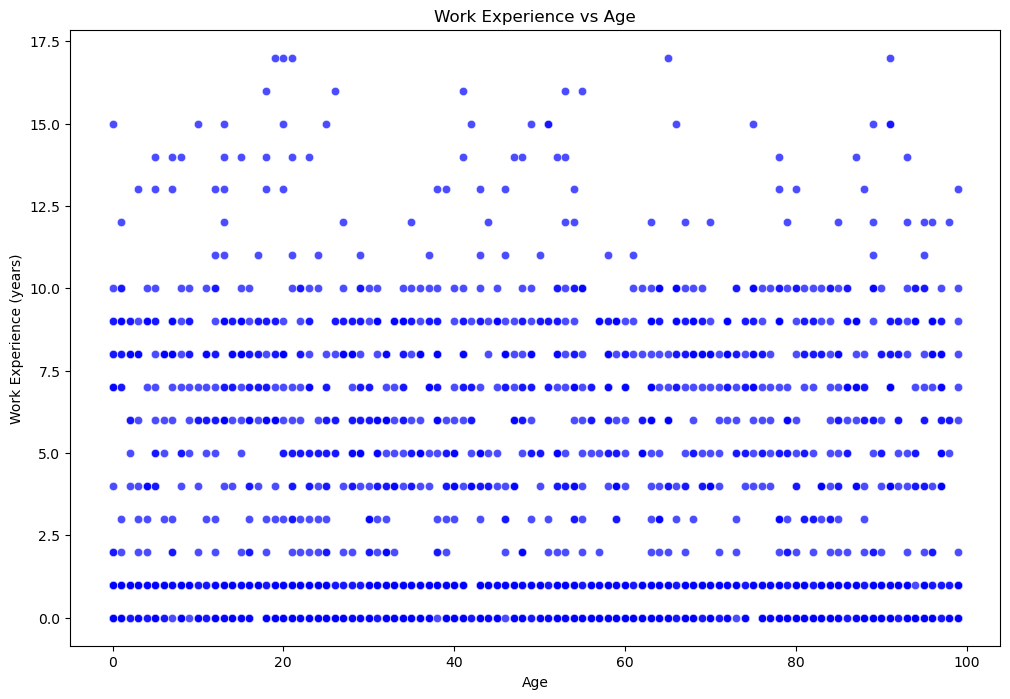

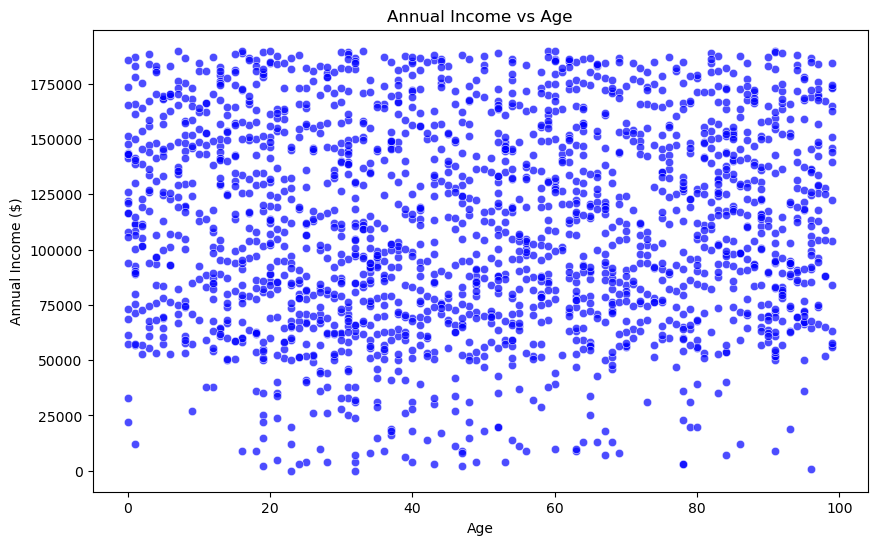

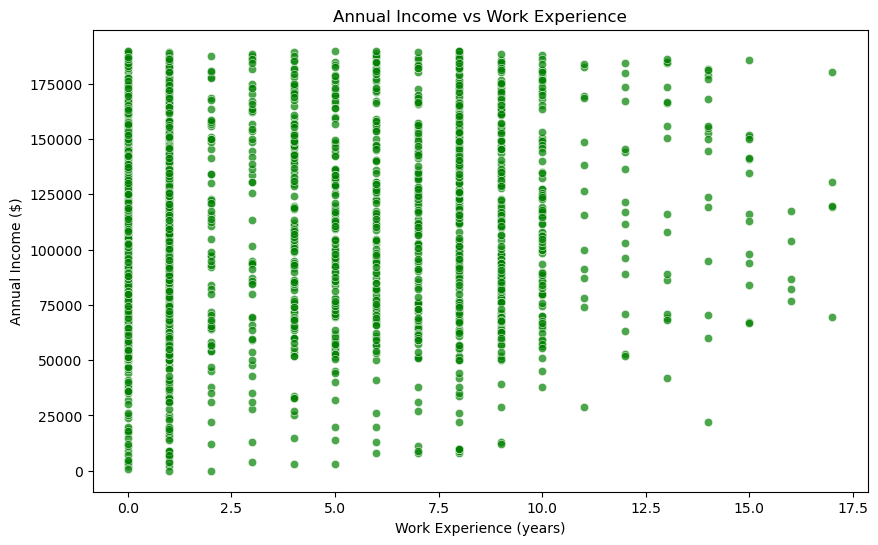

In [42]:
# Work Experience berdasarkan Age
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Work Experience', data=data, color='blue', alpha=0.7)
plt.title('Work Experience vs Age')
plt.xlabel('Age')
plt.ylabel('Work Experience (years)')
plt.show()

# Annual Income berdasarkan Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Annual Income ($)', data=data, alpha=0.7, color='blue')
plt.title('Annual Income vs Age')
plt.xlabel('Age')
plt.ylabel('Annual Income ($)')
plt.show()

# Annual Income berdasarkan Work Experience
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Work Experience', y='Annual Income ($)', data=data, alpha=0.7, color='green')
plt.title('Annual Income vs Work Experience')
plt.xlabel('Work Experience (years)')
plt.ylabel('Annual Income ($)')
plt.show()

###  Membandingkan dengan Diagram Garis

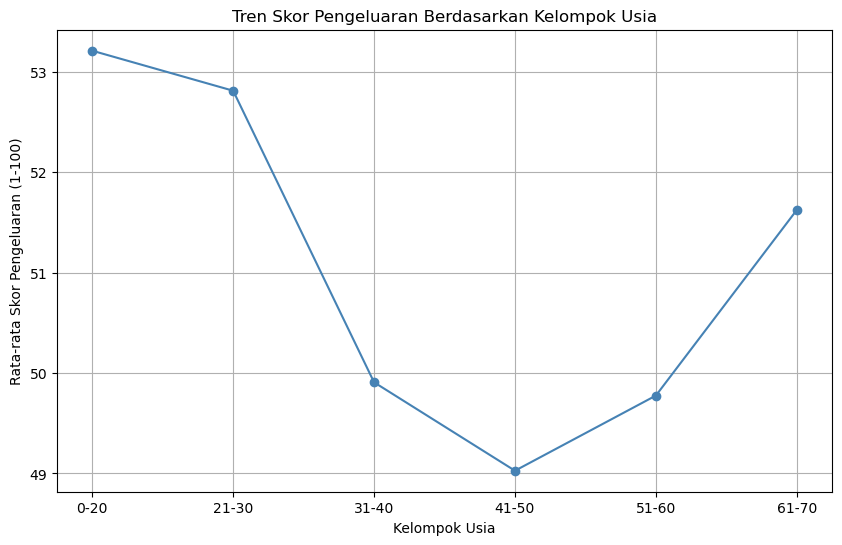

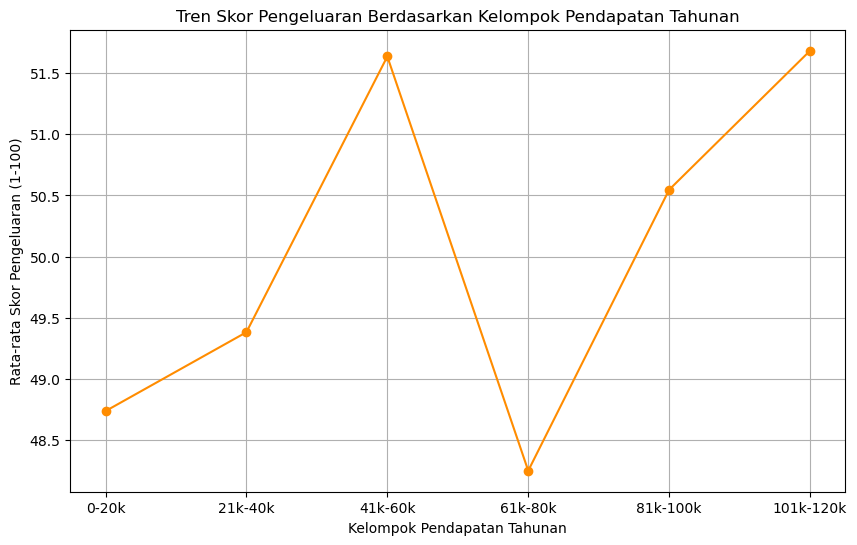

In [43]:
# Spending Score berdasarkan Usia
age_bins = [0, 20, 30, 40, 50, 60, 70]
age_bin_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70']
data['Age Bin'] = pd.cut(data['Age'], bins=age_bins, labels=age_bin_labels)

## Hitung rata-rata Spending Score untuk setiap bin usia
avg_spending_by_age_bin = data.groupby('Age Bin')['Spending Score (1-100)'].mean()
plt.figure(figsize=(10, 6))
avg_spending_by_age_bin.plot(kind='line', marker='o', color='steelblue')
plt.title('Tren Skor Pengeluaran Berdasarkan Kelompok Usia')
plt.xlabel('Kelompok Usia')
plt.ylabel('Rata-rata Skor Pengeluaran (1-100)')
plt.grid(True)
plt.show()

# Spending Score berdasarkan Annual Income
income_bins = [0, 20000, 40000, 60000, 80000, 100000, 120000]
income_bin_labels = ['0-20k', '21k-40k', '41k-60k', '61k-80k', '81k-100k', '101k-120k']
data['Income Bin'] = pd.cut(data['Annual Income ($)'], bins=income_bins, labels=income_bin_labels)

## Hitung rata-rata Spending Score untuk setiap bin pendapatan
avg_spending_by_income_bin = data.groupby('Income Bin')['Spending Score (1-100)'].mean()
plt.figure(figsize=(10, 6))
avg_spending_by_income_bin.plot(kind='line', marker='o', color='darkorange')
plt.title('Tren Skor Pengeluaran Berdasarkan Kelompok Pendapatan Tahunan')
plt.xlabel('Kelompok Pendapatan Tahunan')
plt.ylabel('Rata-rata Skor Pengeluaran (1-100)')
plt.grid(True)
plt.show()


Dengan melakukan analisis data serta visualisasi data yang baik berdasarkan variabel-variabel di atas dapat memberi pengaruh positif terhadap bisnis dan pelanggan diantaranya:

1. Membuat keputusan Bisnis yang Lebih Baik: Analisis data membantu membuat keputusan harga, pemasaran, produk, dan segmentasi pasar yang lebih tepat.

2. Kepuasan Pelanggan yang Lebih Tinggi: Mengetahui apa yang diinginkan pelanggan memungkinkan penyesuaian untuk meningkatkan kepuasan pelanggan dan menciptakan hubungan yang lebih baik.

3. Optimisasi Strategi Bisnis: Dengan menargetkan segmen pasar yang tepat, analisis mendalam membantu mengoptimalkan strategi, efisiensi operasional, dan keuntungan.